# Tugas Analisis Multimedia: Audio, Gambar, Video

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Rizki Alfariz Ramadhan  
**NIM:** 122140061  

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami representasi dasar data multimedia (audio, gambar, dan video) melalui praktik langsung memuat data, visualisasi, dan ekstraksi informasi fundamental. Anda akan bekerja dengan tiga jenis media berbeda untuk menganalisis karakteristik temporal (audio), spasial (gambar), dan spatio-temporal (video).

Fokus tugas adalah pada pemahaman konsep dasar representasi multimedia dan kemampuan interpretasi hasil visualisasi, **bukan** pada manipulasi atau transformasi lanjutan data multimedia.

---

## ⚠️ CATATAN PENTING: PRESENTASI ACAK & KEJUJURAN AKADEMIK

**Sebagian mahasiswa akan dipilih secara ACAK untuk presentasi singkat** (5-10 menit) menjelaskan kode dan interpretasi hasil mereka. Jika Anda:
- Tidak mampu menjelaskan kode yang Anda kumpulkan
- Hanya menyalin-tempel tanpa pemahaman
- Bergantung sepenuhnya pada AI tanpa memahami konsep

**Maka nilai tugas Anda akan diberikan 0 (nol).**

Gunakan referensi dan AI sebagai alat bantu pembelajaran, tetapi pastikan Anda memahami setiap baris kode dan dapat menjelaskan logika di baliknya.

In [59]:
# Import Library (Satu-satunya sel kode dalam template ini)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from PIL import Image
import cv2
from IPython.display import Audio, HTML, display
import os

# Set matplotlib untuk menampilkan plot inline
%matplotlib inline

# Tampilkan versi library untuk dokumentasi
print("Library versions:")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"OpenCV: {cv2.__version__}")

# Tambahkan import lain jika diperlukan saat mengerjakan tugas

Library versions:
NumPy: 2.2.6
Matplotlib: 3.10.6
Librosa: 0.11.0
OpenCV: 4.12.0


## Checklist Kelengkapan (Centang ✅ saat selesai)

### 🎵 Bagian Audio
- [✅] Muat audio dan tampilkan metadata (durasi, sample rate, jumlah kanal)
- [✅] Tampilkan waveform dengan label sumbu yang jelas
- [✅] Tampilkan spectrogram dalam skala log-dB dengan colorbar
- [✅] Tampilkan MFCC (minimal 13 koefisien) sebagai heatmap
- [✅] Berikan interpretasi dan analisis untuk setiap visualisasi audio

### 🖼️ Bagian Gambar
- [✅] Tampilkan gambar dengan benar dalam format RGB
- [✅] Tampilkan informasi dasar (dimensi, jumlah kanal, dtype)
- [✅] Tampilkan histogram warna untuk channel R, G, B
- [✅] Berikan analisis hubungan histogram dengan kesan visual gambar

### 📹 Bagian Video
- [✅] Tampilkan metadata video (resolusi, fps, frame count, durasi)
- [✅] Tampilkan 3 frame representatif (awal, tengah, akhir)
- [✅] Konversi BGR ke RGB dengan benar untuk visualisasi
- [✅] Analisis kesesuaian parameter video dengan use case

### 📝 Analisis & Dokumentasi
- [✅] Setiap bagian memiliki interpretasi dan analisis ringkas
- [✅] Perbandingan representasi ketiga jenis media
- [✅] Kesimpulan pembelajaran dan refleksi
- [✅] Semua sumber data dan referensi dicantumkan

# Pendahuluan

## Apa itu Data Multimedia?

Data multimedia adalah informasi yang dikodekan dalam berbagai format untuk merepresentasikan dunia nyata:

- **Audio (1D)**: Sinyal satu dimensi yang berubah terhadap waktu
  - Contoh: musik, suara, speech
  - Representasi: amplitudo vs waktu
  
- **Gambar (2D)**: Matriks nilai intensitas dalam ruang dua dimensi
  - Contoh: foto, ilustrasi, grafik
  - Representasi: intensitas pixel pada koordinat (x,y)
  
- **Video (2D + Waktu)**: Rangkaian frame (gambar) yang ditampilkan berurutan
  - Contoh: film, rekaman, animasi
  - Representasi: frame berubah terhadap waktu dengan frame rate tertentu

## Tujuan Tugas

Memahami representasi dasar dan teknik visualisasi fundamental untuk setiap jenis media multimedia, termasuk:
- Cara memuat dan membaca file multimedia
- Ekstraksi informasi metadata yang penting
- Visualisasi yang informatif dan mudah dipahami
- Interpretasi hasil analisis secara kontekstual

## Cara Kerja

1. Isi setiap bagian sesuai instruksi yang diberikan
2. Tambahkan sel kode di tempat yang ditandai dengan "TODO"
3. Berikan interpretasi dan analisis setelah setiap visualisasi
4. Pastikan semua plot memiliki judul, label, dan keterangan yang jelas

# Bagian A — Audio

### A1. Deskripsi Data

**TODO:** Jelaskan audio yang akan Anda analisis:
- Jenis audio: Musik non-copyright
- Sumber: [Sumber Youtube](https://youtu.be/AWkcteFEQBM?si=cp4U9cXEK7zLTh4T) 
- Format file: WAV
- Alasan pemilihan: saya suka dengan instrumennya

**Path file:** `data/music.wav`

---



### A2. TODO: Muat & Metadata

**Instruksi:**
Tulis kode untuk memuat file audio dan menampilkan metadata dasar:
- Sample rate (Hz)
- Durasi (detik)
- Jumlah kanal (mono/stereo)
- Jumlah total sampel

**Catatan:** Jika file MP3 bermasalah saat loading, gunakan format WAV sebagai alternatif.

---


In [60]:
from pathlib import Path
import librosa
import soundfile as sf

# A2. TODO: Muat & Metadata

# Buat path yang general
base_dir = Path.cwd() 
audio_path = base_dir / "data" / "music.wav"

# Muat audio
y, sr = librosa.load(str(audio_path), sr=None, mono=False)

# Metadata dengan soundfile
info = sf.info(str(audio_path))

# Hitung metadata tambahan
duration = len(y) / sr if y.ndim == 1 else y.shape[1] / sr
channels = 1 if y.ndim == 1 else y.shape[0]
total_samples = len(y) if y.ndim == 1 else y.shape[1]

# Tampilkan metadata
print("Metadata Audio:")
print(f"- Sample rate     : {sr} Hz")
print(f"- Durasi          : {duration:.2f} detik")
print(f"- Jumlah kanal    : {'Mono' if channels == 1 else 'Stereo'}")
print(f"- Total sampel    : {total_samples}")


Metadata Audio:
- Sample rate     : 44100 Hz
- Durasi          : 157.22 detik
- Jumlah kanal    : Stereo
- Total sampel    : 6933504



### A3. TODO: Waveform

**Instruksi:**
Plot waveform audio dengan:
- Sumbu X: waktu (detik)
- Sumbu Y: amplitudo
- Judul dan label sumbu yang jelas

**Analisis yang diperlukan:**
 Jelaskan apa yang Anda lihat dari waveform (pola amplitudo, bagian keras/pelan, dll.)

---


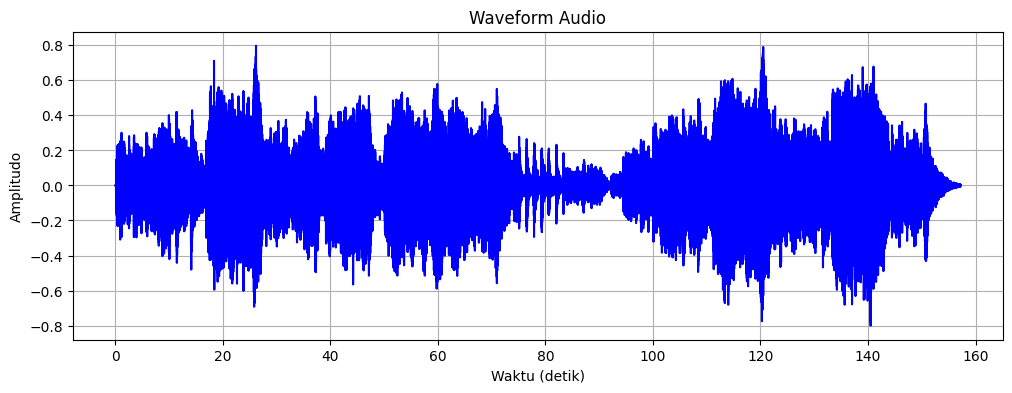

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

# Muat audio
y, sr = librosa.load(str(audio_path), sr=None, mono=True)  # paksa mono biar mudah

# Buat sumbu waktu (detik)
time = np.linspace(0, duration, num=total_samples)

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(time, y, color='blue')
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.title("Waveform Audio")
plt.grid(True)
plt.show()


Pada visualisasi dan informasi data waveform terlihat bahwa amplitudo memiliki variasi sepanjang durasi, amplitudo memliki beberapa fluktuasi yang menunjukkan adanya volume keras atau pelan.
Ada beberapa bagian yang menunjukkan bahwa amplitudo besar contohnya pada durasi ke 115 hingga 120 yang kemungkinan bagian audio yang kuat. Amplitudo rendah terlihat di durasi 80 hingga 100 yang kemungkinan transisi.


### A4. TODO: Spectrogram log-dB

**Instruksi:**
Hitung STFT dan tampilkan spectrogram dalam skala log-dB:
- Gunakan parameter standar (n_fft=1024, hop_length=256)
- Tampilkan dengan colorbar
- Label sumbu: waktu (detik) dan frekuensi (Hz)

**Analisis yang diperlukan:**
Jelaskan perbedaan informasi yang didapat dari spectrogram dibanding waveform.

---


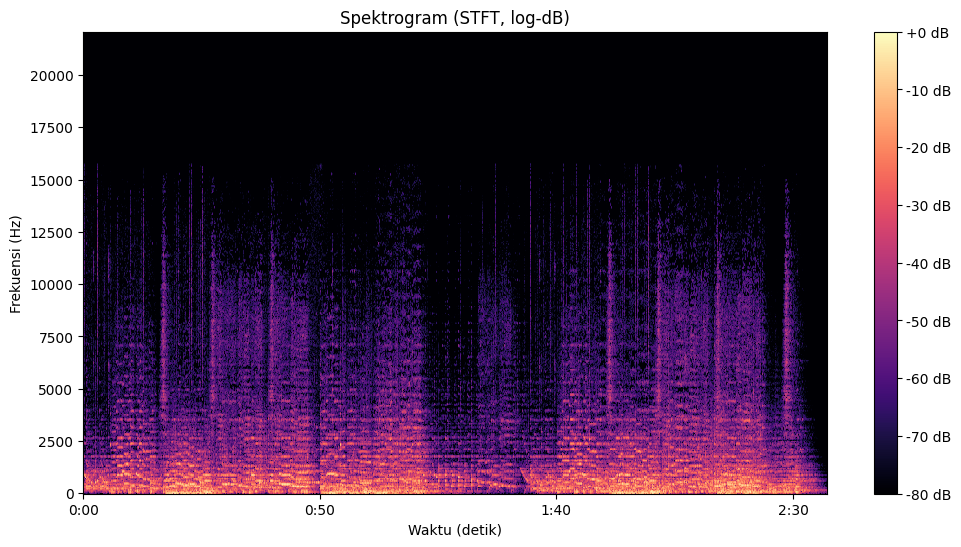

In [62]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Parameter STFT
n_fft = 1024
hop_length = 256

# Hitung STFT (kompleks)
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Konversi ke magnitude
S = np.abs(D)

# Ubah magnitude ke skala log-dB
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot spektrogram
plt.figure(figsize=(12, 6))
img = librosa.display.specshow(
    S_db,
    sr=sr,
    hop_length=hop_length,
    x_axis='time',
    y_axis='hz',
    cmap='magma'
)
plt.colorbar(img, format="%+2.0f dB")
plt.title("Spektrogram (STFT, log-dB)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Frekuensi (Hz)")
plt.show()


Wave form menampilkan peruhaban amplitudo terhadap waktu sehingga dapat mengetahui bagian audio yang keras, pelan, serta jeda antarbagian. Waveform tidak memberikan informasi tentang frekuensi. Sedangkan spectogram memberikan informasi yang lebih lengkap karena menampilkan hubungan frekuensi terhadap waktu, dengan intensitas yang ditunjukkan melalui warna. Dari spectogram, dapat melihat distribusi frekuensi suara, mengenali nada rendah dan tinggi.


### A5. TODO: MFCC

**Instruksi:**
Hitung dan tampilkan minimal 13 koefisien MFCC sebagai heatmap:
- Sumbu X: waktu (frame)
- Sumbu Y: koefisien MFCC (1-13)
- Gunakan colorbar dan judul yang jelas

**Analisis yang diperlukan:**
Interpretasi sederhana: apakah pola MFCC stabil atau berubah-ubah? Apa potensi maknanya?

---


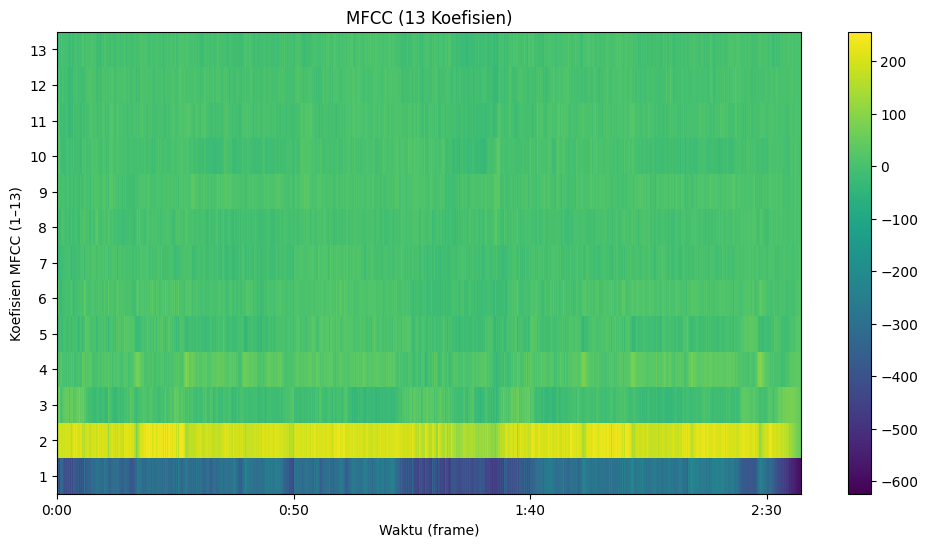

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Hitung MFCC (13 koefisien)
mfccs = librosa.feature.mfcc(
    y=y,
    sr=sr,
    n_mfcc=13,         
    n_fft=1024,
    hop_length=256
)

# Plot sebagai heatmap
plt.figure(figsize=(12, 6))
img = librosa.display.specshow(
    mfccs,
    x_axis='time',
    sr=sr,
    hop_length=256,
    cmap='viridis'
)
plt.colorbar(img)
plt.title("MFCC (13 Koefisien)")
plt.xlabel("Waktu (frame)")
plt.ylabel("Koefisien MFCC (1–13)")
plt.yticks(np.arange(0, 13), np.arange(1, 14))  
plt.show()


Pola MFCC pada audio terlihat stabil dengan sedikti beberapa perubahan, yang menunjukkan bahwa audio relatif konsisten sepanjang durasi. Hal ini berarti audio tidak banyak berubah, dengan hanya sedikit variasi yang menandakan transisi nada beberapa bagian


### A6. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

1. **Perbedaan insight:** Apa perbedaan informasi yang didapat dari waveform versus spectrogram?

   *Jawaban Anda:* Waveform hanya menampilkan amplitudo terhadap waktu sehingga membantu melihat bagian audio yang keras, pelan, dan jeda, tetapi tidak memberikan informasi tentang frekuensi. Spectrogram memberikan gambaran frekuensi terhadap waktu dengan intensitas energi ditunjukkan melalui warna, sehingga kita bisa melihat nada rendah/tinggi, pola harmonik, serta distribusi energi suara.

2. **Pembelajaran dari MFCC:** Apa yang Anda pelajari dari visualisasi MFCC audio ini?

   *Jawaban Anda:* Visualisasi MFCC menunjukkan pola yang stabil dengan hanya sedikit perubahan, yang berarti karakteristik audio relatif konsisten sepanjang durasi. Hal ini menunjukkan bahwa audio tidak banyak berubah, dengan variasi kecil yang kemungkinan menandakan transisi nada atau perubahan pada beberapa bagian.

# Bagian B — Gambar

### B1. Deskripsi Data

**TODO:** Jelaskan gambar yang akan Anda analisis:
- Jenis gambar: Pemandangan
- Sumber:[pexels.com](https://www.pexels.com/photo/close-up-photography-of-cherry-blossom-tree-1440476/)  
- Format file: JPG
- Alasan pemilihan: Karena saya suka dengan gambarnya

**Path file:** `data/image.jpg`

---



### B2. TODO: Baca & Tampilkan (RGB)

**Instruksi:**
Baca gambar dan tampilkan dengan benar dalam format RGB:
- Pastikan konversi warna benar (ingat perbedaan BGR vs RGB di OpenCV)
- Berikan judul yang deskriptif
- Hilangkan axis untuk tampilan yang bersih

**Analisis yang diperlukan:**
Jelaskan gambar secara ringkas (objek dominan, kondisi pencahayaan, komposisi warna).

---


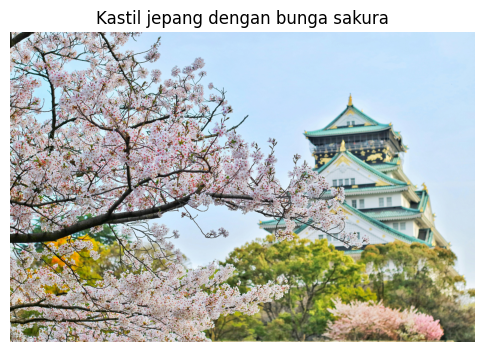

In [34]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Buat path yang general
base_dir = Path.cwd()
image_path = base_dir / "data" / "image.jpg"

# Muat gambar
img_bgr = cv2.imread(str(image_path))

# Konversi ke RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Tampilkan gambar
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Kastil jepang dengan bunga sakura", fontsize=12)
plt.axis("off")  # Hilangkan axis
plt.show()


Gambar didominasi oleh warna pink dari bunga sakura, hijau dari pepohonan, serta biru muda dari langit. Objek utama adalah kastil Jepang di bagian kanan belakang dan pohon sakura di bagian kiri depan yang menjadi fokus foto. Pencahayaan terlihat alami dengan cahaya yang merata sehingga warna tampak cerah dan detail terlihat jelas.


### B3. TODO: Informasi Dasar

**Instruksi:**
Tampilkan informasi metadata gambar:
- Dimensi (Height × Width)
- Jumlah kanal
- Tipe data (dtype)
- Mode warna (jika relevan)
- Ukuran file dalam memori

**Analisis yang diperlukan:**
Jelaskan mengapa informasi ini penting untuk tahap preprocessing atau analisis lanjutan.

---


In [35]:
# Ambil metadata
height, width, channels = img_bgr.shape
dtype = img_bgr.dtype
file_size = os.path.getsize(image_path) / 1024  # ukuran file di disk (KB)
mode = "Grayscale" if channels == 1 else ("RGB" if channels == 3 else f"{channels} channels")

print("Metadata Gambar:")
print(f"- Dimensi        : {height} x {width} piksel")
print(f"- Jumlah kanal   : {channels} ({mode})")
print(f"- Tipe data      : {dtype}")
print(f"- Ukuran file    : {file_size:.2f} KB")
print(f"- Ukuran array   : {img_bgr.nbytes / 1024:.2f} KB (di memori)")

Metadata Gambar:
- Dimensi        : 4000 x 6000 piksel
- Jumlah kanal   : 3 (RGB)
- Tipe data      : uint8
- Ukuran file    : 3450.43 KB
- Ukuran array   : 70312.50 KB (di memori)


Informasi ini penting karena memengaruhi tahap preprocessing seperti resizing, normalisasi piksel, dan konversi warna agar dilakukan dengan benar sehingga tetap konsisten dan tepat.


### B4. TODO: Histogram Warna

**Instruksi:**
Tampilkan histogram distribusi intensitas untuk channel R, G, B:
- Range: 0-255
- Plot terpisah atau overlay dengan warna sesuai channel
- Label sumbu: intensitas pixel dan frekuensi
- Legend yang jelas

**Analisis yang diperlukan:**
Analisis: channel mana yang dominan? Bagaimana kontras gambar? Seperti apa sebaran integritasnya?

---


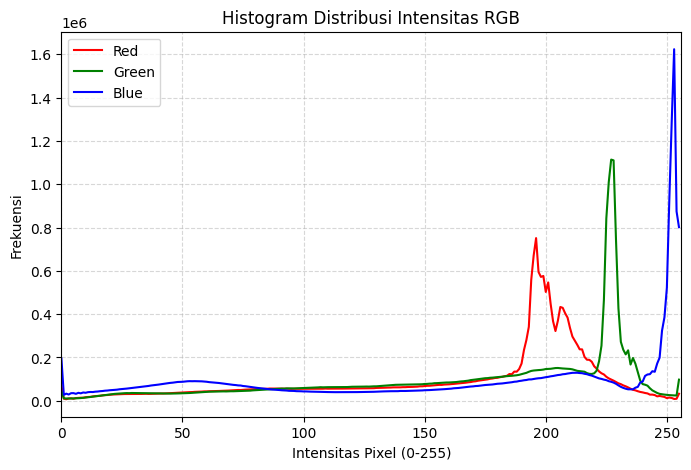

In [36]:
# Hitung histogram untuk setiap channel (R, G, B)
colors = ("r", "g", "b")
channel_names = ("Red", "Green", "Blue")

plt.figure(figsize=(8, 5))

for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=channel_names[i])
    plt.xlim([0, 256])

plt.title("Histogram Distribusi Intensitas RGB")
plt.xlabel("Intensitas Pixel (0-255)")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Channel yang paling dominan pada gambar ini adalah biru, disusul hijau, sedangkan merah paling rendah. Kontras gambar cukup baik karena intensitas piksel tersebar dari gelap hingga terang, dengan banyak piksel berada di area terang. Sebaran intensitas cenderung ke kanan, artinya gambar terlihat lebih cerah secara keseluruhan.


### B5. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Relasi histogram dengan kesan visual:** Apa hubungan antara pola histogram yang Anda lihat dengan kesan visual gambar (terang/gelap, warna dominan, kontras)?

*Jawaban Anda:* Pola histogram menunjukkan sebaran intensitas yang cenderung ke kanan sehingga gambar terlihat cerah. Channel biru paling dominan diikuti hijau, membuat gambar memiliki kesan warna yang didominasi biru-hijau. Sebaran intensitas yang cukup merata dari gelap hingga terang menunjukkan kontras yang baik sehingga detail tetap terlihat jelas. Sesuai dengan apa yang saya lihat di gambar dimana warna biru dan hijau mendominasi.

# Bagian C — Video

### C1. Deskripsi Data

**TODO:** Jelaskan video yang akan Anda analisis:
- Jenis video: Pemandangan
- Sumber: [Sumber Youtube](https://youtu.be/gJEhiPtLp8M?si=QmLsH-d8t38oNSHa) 
- Durasi target: 14 detik
- Alasan pemilihan: Karena saya suka pemandangan

**Path file:** `data/video.mp4`

---



### C2. TODO: Baca & Metadata

**Instruksi:**
Baca video dengan OpenCV dan tampilkan metadata:
- Resolusi (Width × Height)
- Frame rate (fps)
- Jumlah total frame
- Durasi (detik)
- Klasifikasi resolusi (HD, Full HD, 4K, dll.)

**Analisis yang diperlukan:**
Jelaskan pentingnya parameter-parameter tersebut untuk analisis video atau aplikasi tertentu

---


In [42]:
# Buat path yang general
base_dir = Path.cwd()
video_path = base_dir / "data" / "video.mp4"
cap = cv2.VideoCapture(video_path)

# Ambil metadata
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps if fps > 0 else 0

# Klasifikasi resolusi
if width >= 3840 and height >= 2160:
    resolution_class = "4K"
elif width >= 1920 and height >= 1080:
    resolution_class = "Full HD"
elif width >= 1280 and height >= 720:
    resolution_class = "HD"
else:
    resolution_class = "SD"

# Tampilkan hasil
print(f"Resolusi        : {width} x {height}")
print(f"Frame Rate      : {fps:.2f} fps")
print(f"Jumlah Frame    : {total_frames}")
print(f"Durasi          : {duration:.2f} detik")
print(f"Klasifikasi     : {resolution_class}")

cap.release()


Resolusi        : 1280 x 720
Frame Rate      : 24.00 fps
Jumlah Frame    : 340
Durasi          : 14.17 detik
Klasifikasi     : HD


Metadata video berisi informasi penting yang menggambarkan karakteristik dasar sebuah video. Resolusi (Width × Height) digunakan untuk menentukan kualitas visual video serta kebutuhan bandwidth dan penyimpanan. Frame rate (fps) berperan dalam kelancaran gerakan, misalnya 24 fps digunakan untuk film, sedangkan 30–60 fps umum untuk video game. Total frame penting untuk menghitung panjang video dan memungkinkan navigasi frame per frame. Durasi dalam detik memberikan informasi dasar yang berguna untuk pemutaran maupun segmentasi video. Sementara itu, klasifikasi resolusi mempermudah standarisasi analisis, baik untuk aplikasi streaming, kompresi, maupun computer vision.


### C3. TODO: Tampilkan 3 Frame (Awal–Tengah–Akhir)

**Instruksi:**
Ambil dan tampilkan 3 frame representatif:
- Frame pertama (index 0)
- Frame tengah (index ~total_frame/2)
- Frame terakhir (index total_frame-1)
- **Konversi BGR→RGB** sebelum ditampilkan
- Subplot dengan judul frame dan timestamp

**Analisis yang diperlukan:**
Deskripsikan perbedaan visual antar frame dan apa yang dapat dipelajari dari sampel frame ini.

---


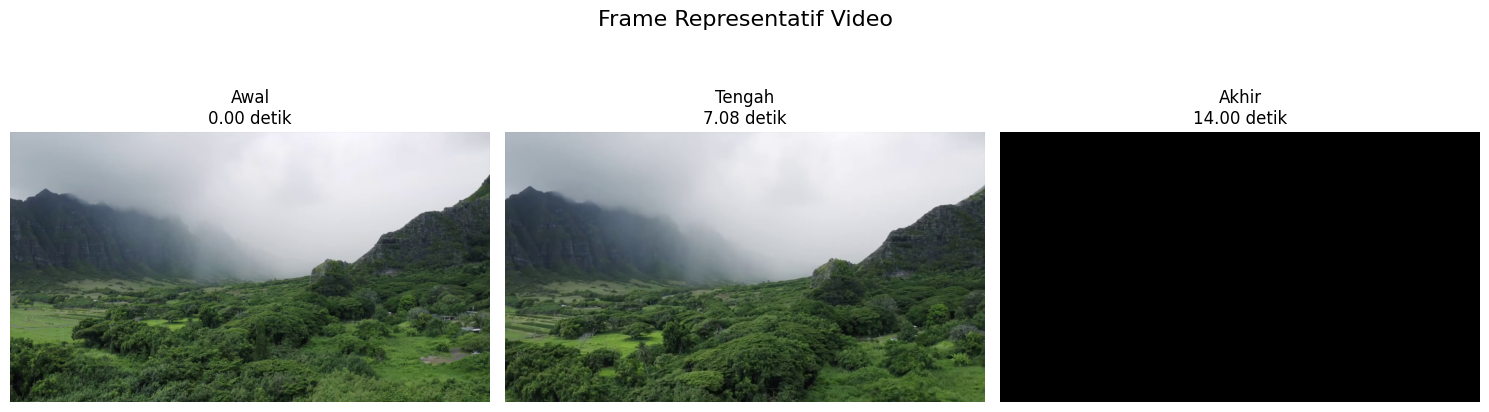

In [58]:
# Buka video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Tidak bisa membuka video: {video_path}")

# Ambil metadata dasar
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Tentukan index frame awal, tengah, akhir
frame_indices = [0, total_frames // 2, max(0, total_frames - 4)]
frames = []
timestamps = []

for idx in frame_indices:
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)  # pindah ke frame tertentu
    ret, frame = cap.read()
    if ret:
        # Konversi BGR -> RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
        timestamps.append(idx / fps)
    else:
        frames.append(None)
        timestamps.append(None)

cap.release()

# Plot frame
plt.figure(figsize=(15, 5))
titles = ["Awal", "Tengah", "Akhir"]

for i, (frame, ts, title) in enumerate(zip(frames, timestamps, titles)):
    plt.subplot(1, 3, i+1)
    if frame is not None:
        plt.imshow(frame)
        plt.title(f"{title}\n{ts:.2f} detik")
    else:
        plt.text(0.5, 0.5, "Frame tidak terbaca", ha="center", va="center")
    plt.axis("off")

plt.suptitle("Frame Representatif Video", fontsize=16)
plt.tight_layout()
plt.show()

Frame awal dan tengah menunjukkan pemandangan pegunungan hijau dengan kabut, namun sudut pandang dan pencahayaan sedikit berbeda sehingga memberi kesan perubahan suasana dari awal ke tengah video. Frame akhir terlihat gelap, menandakan akhir video atau transisi ke layar hitam. Dari ketiga frame ini, dapat dipelajari bahwa video menampilkan suasana alam yang konsisten di awal dan tengah, lalu diakhiri dengan transisi ke gelap, yang memberi kesan penutupan atau akhir cerita.


### C4. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Kesesuaian parameter:** Apakah fps dan resolusi video ini sesuai untuk use case pilihan Anda (misalnya: media sosial, kuliah daring, presentasi, dll.)? Jelaskan alasan singkat.

*Jawaban Anda:* fps dan resolusi video untuk use case kuliah daring. Resolusi yang cukup tinggi membuat teks dan slide presentasi terbaca dengan jelas, sedangkan fps yang stabil memastikan gerakan dosen atau penjelasan di layar terlihat mulus sehingga mudah diikuti oleh mahasiswa.

# Perbandingan & Kesimpulan

## Perbandingan Representasi Media

**TODO:** Bandingkan secara ringkas representasi dan visualisasi ketiga media:

### Audio (1D - Temporal)
- Representasi: Sinyal 1D terhadap waktu (amplitudo vs waktu).
- Visualisasi utama: Waveform, spektrogram, dan MFCC.
- Informasi yang diperoleh: Karakter audio (keras/lemah, stabil/berubah), distribusi energi di frekuensi tertentu, serta pola yang menunjukkan konsistensi atau variasi suara.

### Gambar (2D - Spasial)  
- Representasi: Matriks 2D berisi nilai warna (RGB) untuk setiap piksel.
- Visualisasi utama: Tampilan gambar dalam format RGB dan histogram distribusi warna.
- Informasi yang diperoleh: Tingkat kontras, warna dominan, metadata gambar (dimensi, kanal), dan hubungan distribusi intensitas piksel dengan tampilan visual.

### Video (2D + Waktu - Spatio-temporal)
- Representasi: Rangkaian frame 2D yang berurutan sepanjang waktu.
- Visualisasi utama: frame (awal, tengah, akhir) dan metadata seperti resolusi, fps, dan durasi.
- Informasi yang diperoleh: Gerakan, serta kualitas teknis video (resolusi dan frame rate), jumlah frame, durasi.

---

## Refleksi Pembelajaran

### 3 Poin yang Saya Pelajari:
1. Audio dapat divisualisasikan ke dalam bentuk spektogram, waveform, MFCC untuk di pahami dan analisis karakteristik dari audio tanpa harus mendengarkan.
2. Gambar dapat dianalisis melalui representasi RGB dan histogram warna untuk mengetahui distribusi warna, tingkat kontras, serta informasi teknis seperti dimensi dan ukuran file.
3. Video dianalisis melalui metadata (resolusi, fps, durasi) dan cuplikan frame, sehingga kita dapat memahami kualitas visual, kelancaran gerakan, serta alur peristiwa dalam video.

### 2 Hal yang Masih Membingungkan/Ingin Diperdalam:
1. Cara membaca dan menginterpretasikan MFCC secara lebih mendalam untuk mengenali pola audio yang kompleks.
2. Teknik analisis video yang lebih lanjut, seperti ekstraksi objek atau pendeteksian gerakan dari setiap frame.

---

## Sumber Data & Referensi

**TODO:** Cantumkan semua sumber data dan referensi yang digunakan:

- **Audio:** [Sumber Youtube](https://youtu.be/AWkcteFEQBM?si=cp4U9cXEK7zLTh4T) 
- **Gambar:** [pexels.com](https://www.pexels.com/photo/close-up-photography-of-cherry-blossom-tree-1440476/) 
- **Video:** [Sumber Youtube](https://youtu.be/gJEhiPtLp8M?si=QmLsH-d8t38oNSHa)  
- **Referensi teknis:** [ChatGPT](https://chatgpt.com/share/68c59cae-b974-8010-ac81-9e8152266581), [Slide Ajar](https://mctm.web.id/course/if25-40305)